# VGGNet

## 1. Environment Setup

### 1.0. Check GPU

In [1]:
!nvidia-smi

Tue Jun 23 03:19:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64       Driver Version: 440.64       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  TITAN Xp            Off  | 00000000:17:00.0 Off |                  N/A |
|  0%   25C    P0    64W / 250W |     12MiB / 12196MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  TITAN Xp            Off  | 00000000:65:00.0 Off |                  N/A |
|  0%   36C    P2   189W / 250W |   9102MiB / 12196MiB |     41%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

### 1.1. Install Pytorch and torchvision

In [2]:
# Install pytorch and torchvision
!pip install --default-timeout=1000 torch torchvision

You should consider upgrading via the 'pip install --upgrade pip' command.


### 1.2. Install matplotlib

In [3]:
!pip install --default-timeout=1000 matplotlib

You should consider upgrading via the 'pip install --upgrade pip' command.


### 1.3. Import

In [4]:
import train

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

# Ignore Warning
import warnings
warnings.filterwarnings(action='ignore')

## 2. Data Preprocessing

In [5]:
batch_size = 256

In [6]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(32),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

trainset = torchvision.datasets.CIFAR10('./data/', train=True, download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, pin_memory=True)

testset = torchvision.datasets.CIFAR10('./data/', train=False, download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, pin_memory=True)

Files already downloaded and verified
Files already downloaded and verified


## 3. Train Model

In [7]:
depth = 16
batch_norm = True
num_classes = 10
pretrained = False

gpu_id = 0
epoch_print = 20

epochs = 380

lr = 0.05
momentum = 0.9
weight_decay = 0.0005
milestones = [140, 270]

In [8]:
vgg = train.VGGNet(depth=depth, batch_norm=batch_norm, num_classes=num_classes, 
                   gpu_id=gpu_id, epoch_print=epoch_print)

=> Create model with depth : 16, batch_norm : True


In [9]:
vgg.train(trainloader, testloader, 
          epochs=epochs, lr=lr, momentum=momentum, weight_decay=weight_decay, milestones=milestones)

Epoch 1 Started...
Iteration : 10 - Train Loss : 3.62, Test Loss : 906.67, Train Acc : 7.42, Test Acc : 10.04
Iteration : 20 - Train Loss : 2.33, Test Loss : 6.77, Train Acc : 11.72, Test Acc : 13.85
Iteration : 30 - Train Loss : 2.67, Test Loss : 2.75, Train Acc : 8.20, Test Acc : 12.11
Iteration : 40 - Train Loss : 2.32, Test Loss : 2.38, Train Acc : 9.38, Test Acc : 10.10
Iteration : 50 - Train Loss : 2.29, Test Loss : 2.30, Train Acc : 10.16, Test Acc : 10.57
Iteration : 60 - Train Loss : 2.29, Test Loss : 2.30, Train Acc : 9.38, Test Acc : 10.52
Iteration : 70 - Train Loss : 2.28, Test Loss : 2.33, Train Acc : 11.72, Test Acc : 11.04
Iteration : 80 - Train Loss : 2.36, Test Loss : 3.18, Train Acc : 14.84, Test Acc : 10.76
Iteration : 90 - Train Loss : 2.30, Test Loss : 2.29, Train Acc : 8.20, Test Acc : 11.86
Iteration : 100 - Train Loss : 2.30, Test Loss : 2.30, Train Acc : 11.33, Test Acc : 10.34
Iteration : 110 - Train Loss : 2.30, Test Loss : 2.30, Train Acc : 9.38, Test Acc :

Iteration : 150 - Train Loss : 0.57, Test Loss : 0.57, Train Acc : 81.25, Test Acc : 82.85
Iteration : 160 - Train Loss : 0.65, Test Loss : 0.51, Train Acc : 79.69, Test Acc : 84.62
Iteration : 170 - Train Loss : 0.75, Test Loss : 0.47, Train Acc : 75.39, Test Acc : 84.55
Iteration : 180 - Train Loss : 0.53, Test Loss : 0.42, Train Acc : 80.47, Test Acc : 86.46
Iteration : 190 - Train Loss : 0.56, Test Loss : 0.47, Train Acc : 82.03, Test Acc : 84.82
Epoch 101 Started...
Iteration : 10 - Train Loss : 0.65, Test Loss : 0.54, Train Acc : 80.47, Test Acc : 83.31
Iteration : 20 - Train Loss : 0.58, Test Loss : 0.50, Train Acc : 78.12, Test Acc : 84.57
Iteration : 30 - Train Loss : 0.54, Test Loss : 0.48, Train Acc : 80.47, Test Acc : 85.06
Iteration : 40 - Train Loss : 0.57, Test Loss : 0.45, Train Acc : 80.47, Test Acc : 86.15
Iteration : 50 - Train Loss : 0.54, Test Loss : 0.57, Train Acc : 81.25, Test Acc : 83.62
Iteration : 60 - Train Loss : 0.61, Test Loss : 0.67, Train Acc : 77.34, T

Iteration : 100 - Train Loss : 0.25, Test Loss : 0.33, Train Acc : 92.97, Test Acc : 91.56
Iteration : 110 - Train Loss : 0.23, Test Loss : 0.32, Train Acc : 92.19, Test Acc : 91.65
Iteration : 120 - Train Loss : 0.25, Test Loss : 0.32, Train Acc : 89.45, Test Acc : 92.08
Iteration : 130 - Train Loss : 0.26, Test Loss : 0.32, Train Acc : 89.84, Test Acc : 92.07
Iteration : 140 - Train Loss : 0.23, Test Loss : 0.33, Train Acc : 92.19, Test Acc : 91.96
Iteration : 150 - Train Loss : 0.31, Test Loss : 0.32, Train Acc : 89.45, Test Acc : 91.83
Iteration : 160 - Train Loss : 0.26, Test Loss : 0.32, Train Acc : 92.19, Test Acc : 91.84
Iteration : 170 - Train Loss : 0.24, Test Loss : 0.31, Train Acc : 92.97, Test Acc : 92.06
Iteration : 180 - Train Loss : 0.24, Test Loss : 0.31, Train Acc : 91.41, Test Acc : 92.04
Iteration : 190 - Train Loss : 0.27, Test Loss : 0.31, Train Acc : 90.62, Test Acc : 92.22
Epoch 201 Started...
Iteration : 10 - Train Loss : 0.27, Test Loss : 0.35, Train Acc : 91.

Iteration : 50 - Train Loss : 0.13, Test Loss : 0.32, Train Acc : 95.70, Test Acc : 92.70
Iteration : 60 - Train Loss : 0.22, Test Loss : 0.32, Train Acc : 94.53, Test Acc : 92.78
Iteration : 70 - Train Loss : 0.17, Test Loss : 0.32, Train Acc : 94.14, Test Acc : 92.77
Iteration : 80 - Train Loss : 0.24, Test Loss : 0.32, Train Acc : 92.58, Test Acc : 92.81
Iteration : 90 - Train Loss : 0.19, Test Loss : 0.33, Train Acc : 95.31, Test Acc : 92.67
Iteration : 100 - Train Loss : 0.20, Test Loss : 0.32, Train Acc : 93.75, Test Acc : 92.66
Iteration : 110 - Train Loss : 0.21, Test Loss : 0.32, Train Acc : 90.23, Test Acc : 92.77
Iteration : 120 - Train Loss : 0.18, Test Loss : 0.33, Train Acc : 92.97, Test Acc : 92.72
Iteration : 130 - Train Loss : 0.28, Test Loss : 0.32, Train Acc : 92.19, Test Acc : 92.69
Iteration : 140 - Train Loss : 0.25, Test Loss : 0.32, Train Acc : 91.80, Test Acc : 92.73
Iteration : 150 - Train Loss : 0.28, Test Loss : 0.32, Train Acc : 89.45, Test Acc : 92.73
Iter

Iteration : 190 - Train Loss : 0.28, Test Loss : 0.36, Train Acc : 91.02, Test Acc : 92.88


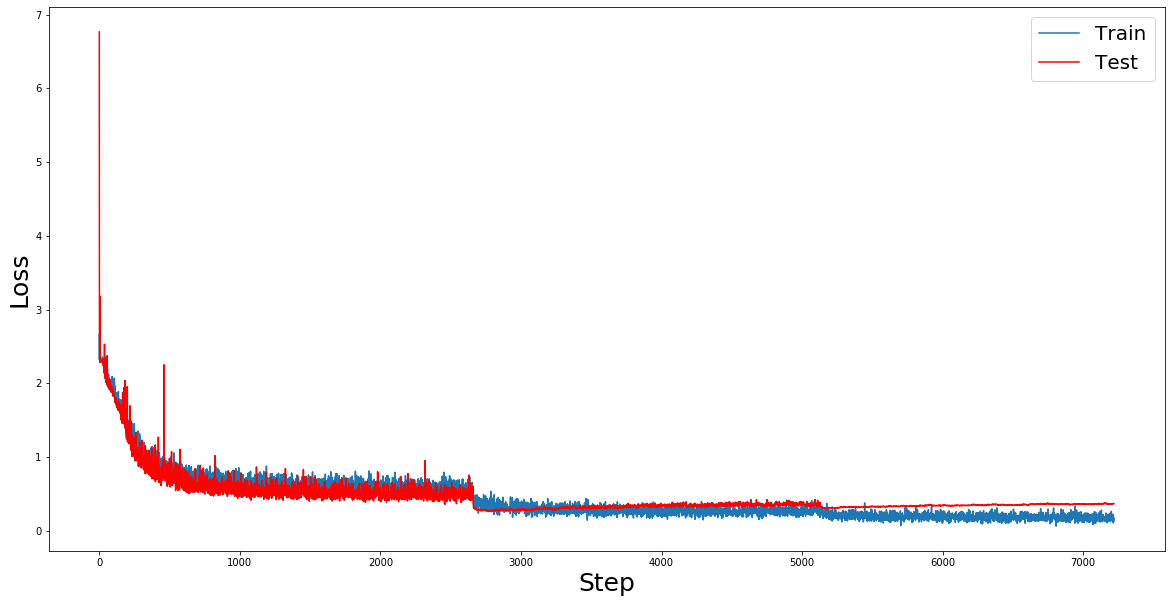

In [10]:
label_fontsize = 25

plt.figure(figsize=(20, 10))
train_lossline, = plt.plot(vgg.train_losses[1:], label='Train')
test_lossline, = plt.plot(vgg.test_losses[1:], color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)
plt.show()

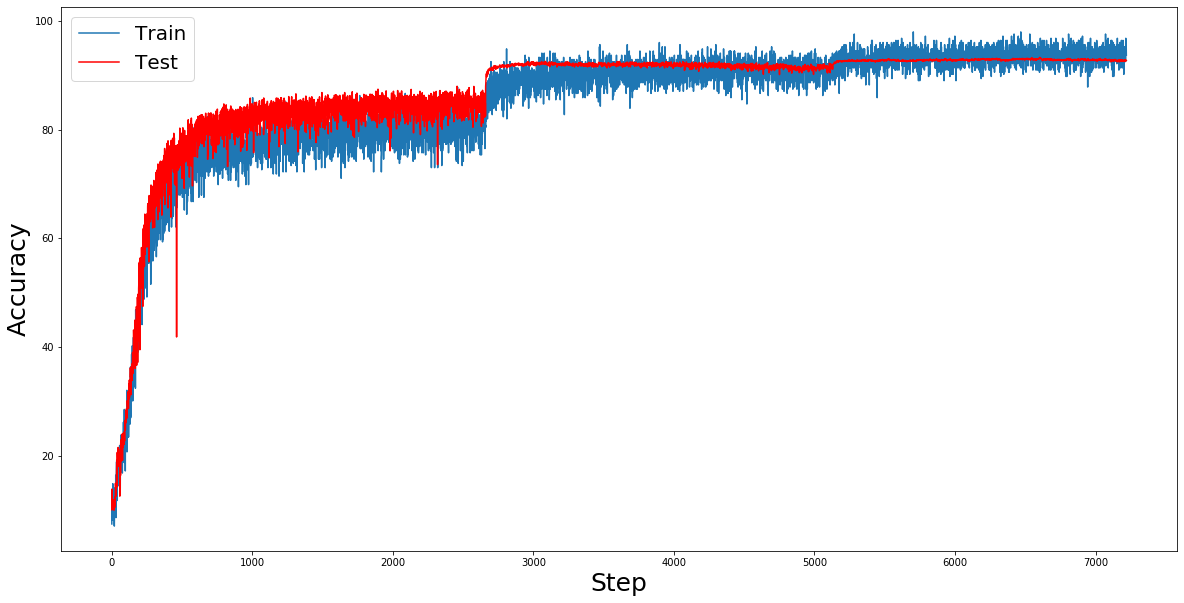

In [11]:
plt.figure(figsize=(20, 10))
train_accline, = plt.plot(vgg.train_acc, label='Train')
test_accline, = plt.plot(vgg.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Accuracy', fontsize=label_fontsize)
plt.show()